### 자료분석: 2022 표준지 공시지가.csv

#### 1. 자료 불러오기

##### 코랩마운트

In [1]:
#코랩 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##### 파일불러오기

In [2]:
#csv 불러오기
#경로부분 직접 수정

import pandas as pd
from pandas import DataFrame
from pandas import Series
import numpy as np

filename = '/content/drive/MyDrive/저장용/2022 표준지 공시지가.csv'
data = pd.read_csv(filename, index_col = False)
data

<ipython-input-2-28db20e9b302>:10: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filename, index_col = False)


,일련번호,시군구,읍면동리,지번구분,본번지,부번지,시도명,시군구명,소재지,지목,...,용도지역2,이용상황,주위환경,지세명,형상명,도로교통,공시지가,지리적위치1,지리적위치2,방위
0,1,11110,10100,1,0003,52,서울특별시,종로구,청운동 3-52,공원,...,NaN,공원등,시가지주변 야산지대,급경사지,부정형,세로(불),493500,경기상고,북측 인근,NaN
1,2,11110,10100,1,0004,2,서울특별시,종로구,청운동 4-2,임야,...,NaN,자연림,시가지주변 야산지대,완경사지,부정형,맹지,730500,경가상고,북서측 근거리,남향
2,3,11110,10100,1,0004,15,서울특별시,종로구,청운동 4-15,대,...,NaN,단독주택,기존 주택지대,완경사지,사다리형,세로(가),4250000,경기상고,북서측 인근,북동향
3,4,11110,10100,1,0008,9,서울특별시,종로구,청운동 8-9,대,...,NaN,연립주택,일반 주택지대,급경사지,부정형,세로(가),3930000,청운중학교,서측인근,남향
4,5,11110,10100,1,0008,15,서울특별시,종로구,청운동 8-15,대,...,NaN,연립주택,기존 주택지대,급경사지,사다리형,세로(가),3855000,경기상고,서측인근,남서향
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540045,4367,50130,32026,1,1582,0,제주특별자치도,서귀포시,표선면 토산리 1582,전,...,NaN,과수원,지방도주변 농경지대,평지,사다리형,맹지,18500,토산1리노인복지회관,북측 원거리,NaN
540046,4368,50130,32026,1,1629,1,제주특별자치도,서귀포시,표선면 토산리 1629-1,전,...,NaN,전,순수 농경지대,평지,사다리형,소로한면,61000,소소름,남동측 인근,NaN
540047,4369,50130,32026,1,1766,1,제주특별자치도,서귀포시,표선면 토산리 1766-1,과수원,...,NaN,과수원,지방도주변 농경지대,완경사지,부정형,세로(가),49500,토산1리사무소,북서측 인근,NaN
540048,4370,50130,32026,1,1876,0,제주특별자치도,서귀포시,표선면 토산리 1876,과수원,...,NaN,과수원,지방도주변 농경지대,완경사지,부정형,중로한면,89000,토산1리사무소,남서측 인근,NaN


#### 2. 데이터 개요/전처리

In [3]:
#데이터 표시 설정: 소수점 없이
pd.options.display.float_format = '{: .0f}'.format

##### 데이터 그룹핑

In [4]:
#시도명 그룹핑
grouped = data['공시지가'].groupby(data['시도명'])
grouped.mean()

시도명
강원도         166443
경기도         870974
경상남도        225961
경상북도        145455
광주광역시       754257
대구광역시      1364956
대전광역시       979974
부산광역시      2064696
서울특별시      7164054
세종특별자치시     367725
울산광역시       778206
인천광역시      1202530
전라남도         86600
전라북도        121223
제주특별자치도     325672
충청남도        142806
충청북도        160908
Name: 공시지가, dtype: float64

In [5]:
#시도명 및 시군구명 기준 그룹핑
grouped = data['공시지가'].groupby([data['시도명'], data['시군구명']])
grouped.mean()

시도명   시군구명 
강원도   강릉시      242887
      고성군       80012
      동해시      175142
      삼척시       86061
      속초시      599177
                ...  
충청북도  청주상당구    364843
      청주서원구    428301
      청주청원구    285061
      청주흥덕구    399424
      충주시      146927
Name: 공시지가, Length: 249, dtype: float64

In [6]:
#시도명 및 주위환경 기준 그룹핑
grouped = data['공시지가'].groupby([data['시도명'], data['주위환경']])
grouped.mean()

시도명   주위환경       
강원도   개발 예정지대         305602
      계곡 유원지대          45000
      고급 주택지대         384929
      고밀도 상가지대       8165833
      고속도로주변 주택지대     351500
                      ...   
충청북도  지방도주변 야산지대       16814
      취락구조 개선마을       174382
      한옥지대            267000
      해안 농경지대           8300
      후면 상가지대         662682
Name: 공시지가, Length: 1552, dtype: float64

In [7]:
data['주위환경'].unique()

array(['시가지주변 야산지대', '기존 주택지대', '일반 주택지대', '고급 주택지대', '노선 상가지대',
       '시가지주변 산림지대', '미개발지대', '주택 및 상가혼용지대', '미성숙 상가지대', '한옥지대',
       '후면 상가지대', '도심 업무지대', '시장지대', '시장주변 상가지대', '성숙중인 상가지대', '아파트지대',
       '공원 산림지대', '도심 상가지대', '중심 상가지대', '고밀도 상가지대', '번화한 상가지대', '일반 상가지대',
       '기존 상가지대', '역주변 상가지대', '기타', '도심재개발 예정지대', '공동 주택지대',
       '아파트단지주변 상가지대', '성숙중인 주택지대', '연립 주택지대', '신흥 주택지대', '미성숙 주택지대',
       '전원 주택지대', '마을주변 산림지대', '시가지주변 농경지대', '마을주변 농경지대', '주택재개발 예정지대',
       '정비된 주택지대', '도시 유원지대', '상가 및 업무지대', '신구옥 혼성지대', '일반 업무지대',
       '정비된 상가지대', '기존 공장지대', '공장 및 업무지대', '시가지주변 공장지대', '소규모 공장지대',
       '개발 예정지대', '순수 야산지대', '국도주변 농경지대', '마을주변 야산지대', '산간 농경지대',
       '근교 농경지대', '순수 산림지대', '국도변 상가지대', '지방도변 상가지대', '고속도로주변 주택지대',
       '근교 농촌지대', '시가지주변 경지정리지대', '마을주변 경지정리지대', '근교 경지정리지대',
       '지방도주변 경지정리지대', '순수 농촌지대', '산업단지', '국도주변 야산지대', '순수 농경지대',
       '지방도주변 농경지대', '산간 취락지대', '해안 상가지대', '관광 유원지대', '해안 야산지대', '온천지대',
       '해안 농경지대', '해안 산림지대', '국도주변 산림지대', '산간 유원지

#### *plt 불러오기 및 한글설정

In [8]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [9]:
#plt 임포트, 한글폰트 설치후 런타임 재시작 필요

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

####3. 데이터 시각화

<Axes: xlabel='시도명'>

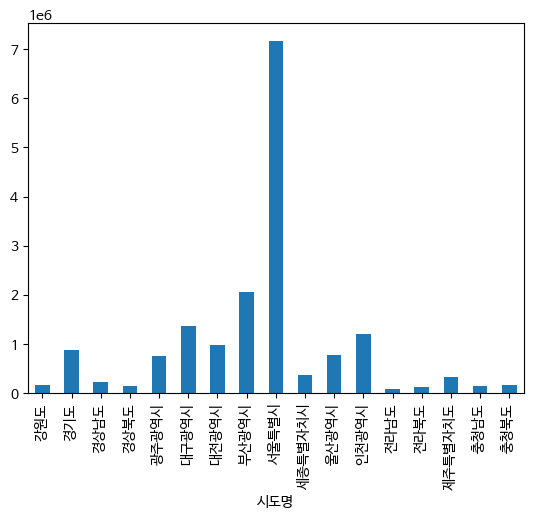

In [10]:
#시도명 그룹핑
grouped = data['공시지가'].groupby(data['시도명'])
df1=grouped.mean()

df1.plot(kind='bar',x=data['공시지가'],y=data['시도명'])

##### 내림차순정렬

In [11]:
#림차순정렬

import plotly.express as px

grouped = data['공시지가'].groupby(data['시도명'])
df1=grouped.mean().reset_index()
df1=df1.sort_values(by='공시지가' ,ascending=False)
df1

,시도명,공시지가
8,서울특별시,7164054
7,부산광역시,2064696
5,대구광역시,1364956
11,인천광역시,1202530
6,대전광역시,979974
1,경기도,870974
10,울산광역시,778206
4,광주광역시,754257
9,세종특별자치시,367725
14,제주특별자치도,325672


<BarContainer object of 17 artists>

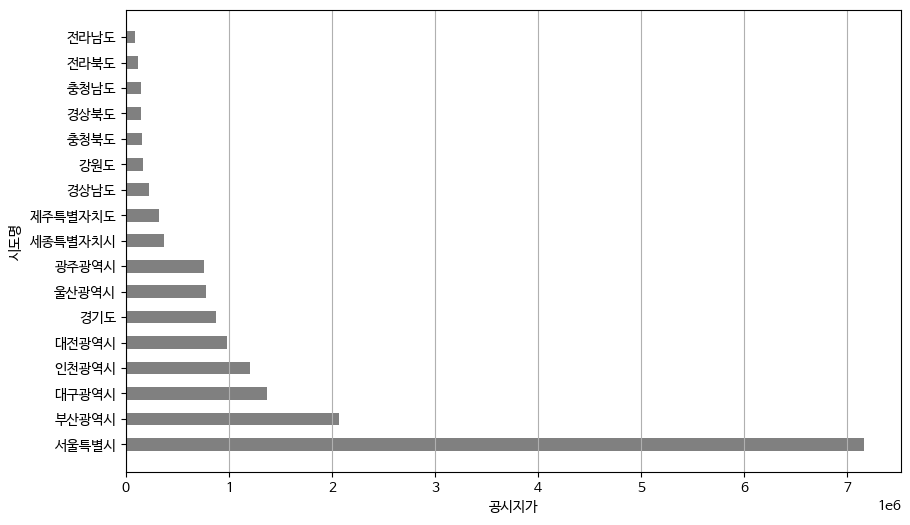

In [12]:
xs=df1['시도명'].to_list()
ys=df1['공시지가'].to_list()

plt.figure(figsize=(10, 6))			#그래프 크기 지정
plt.ylabel('시도명')				#그래프 x축 이름(label) 지정
plt.xlabel('공시지가')				#그래프 y축 이름(label) 지정

plt.grid(True, axis='x')

plt.barh(xs, ys, height=0.5, color='grey')

### 활용: 대구지역 시군구별 공시지가 분석

In [13]:
#데이터프레임 분할

grouped = data.groupby(data['시도명'])
dfDaegu = grouped.get_group("대구광역시")
dfDaegu

,일련번호,시군구,읍면동리,지번구분,본번지,부번지,시도명,시군구명,소재지,지목,...,용도지역2,이용상황,주위환경,지세명,형상명,도로교통,공시지가,지리적위치1,지리적위치2,방위
49403,1,27110,10100,1,0009,0007,대구광역시,중구,동인동1가 9-7,대,...,NaN,상업용,후면 상가지대,평지,세로장방형,세로(가),1710000,대구시청,북측인근,NaN
49404,2,27110,10100,1,0010,0006,대구광역시,중구,동인동1가 10-6,대,...,NaN,단독주택,일반 주택지대,평지,세로장방형,세각(불),1340000,대구시청,북측인근,동향
49405,3,27110,10100,1,0014,0001,대구광역시,중구,동인동1가 14-1,대,...,NaN,상업용,노선 상가지대,평지,가로장방형,광대세각,3190000,대구시청,북측인근,NaN
49406,4,27110,10100,1,0018,0000,대구광역시,중구,동인동1가 18,대,...,NaN,주거나지,일반 주택지대,평지,세로장방형,세로(불),1310000,대구시청,북서측인근,동향
49407,5,27110,10100,1,0049,0003,대구광역시,중구,동인동1가 49-3,대,...,NaN,상업용,노선 상가지대,평지,사다리형,광대세각,3180000,대구시청,북측인근,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63115,2824,27710,38035,1,0523,0011,대구광역시,달성군,구지면 도동리 523-11,대,...,NaN,단독주택,농촌 취락지대,평지,사다리형,세각(가),262000,절골마을,내,남서향
63116,2825,27710,38035,1,0524,0001,대구광역시,달성군,구지면 도동리 524-1,답,...,NaN,답,마을주변 농경지대,평지,사다리형,세로(가),244000,절골마을,내,NaN
63117,2826,27710,38035,1,0550,0000,대구광역시,달성군,구지면 도동리 550,전,...,NaN,전,마을주변 농경지대,완경사지,부정형,맹지,88000,절골마을,남측인근,NaN
63118,2827,27710,38035,1,0563,0001,대구광역시,달성군,구지면 도동리 563-1,답,...,NaN,전,마을주변 농경지대,평지,사다리형,중로각지,198500,절골마을,남측인근,NaN


<ipython-input-21-4f0612b1d8c3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfDaegu[['소재지_1', '소재지_2']] = dfDaegu['소재지'].str.split(' ', n=1, expand=True)


<BarContainer object of 204 artists>

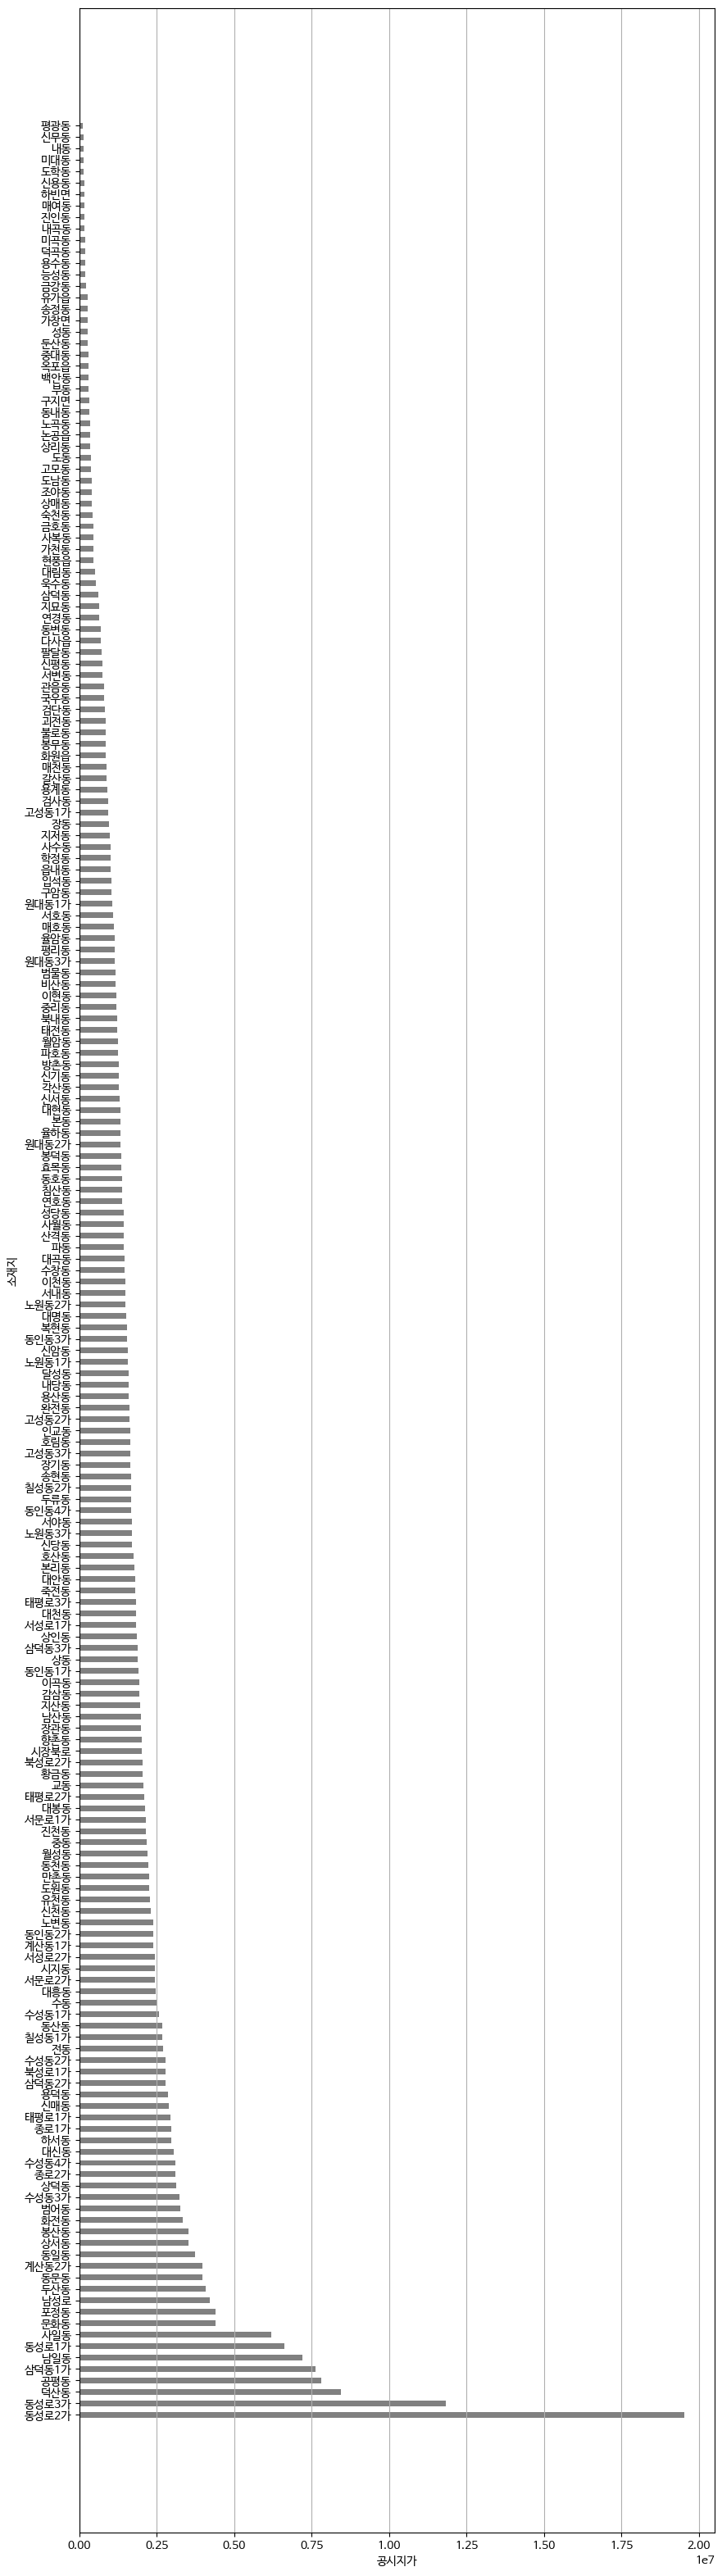

In [21]:
#소재지 문자열 변환
"""
tmp = dfDaegu['소재지'].str.split(' ')
dfDaegu['소재지동단위']=tmp
"""

#공백 기준으로 소재지 내 문자열 분할
#예시: '동인동1가 9-7' -> '동인동1가', '9-7'로 분할
dfDaegu[['소재지_1', '소재지_2']] = dfDaegu['소재지'].str.split(' ', n=1, expand=True)



#소재별-동단위 공시지가
grouped = dfDaegu['공시지가'].groupby([dfDaegu['시군구명'], dfDaegu['소재지_1']])
df2=grouped.mean().reset_index()




#데이터 내림차순 정렬
df2=df2.sort_values(by='공시지가' ,ascending=False)




#시각화
xs=df2['소재지_1'].to_list()
ys=df2['공시지가'].to_list()

plt.figure(figsize=(10, 40))			#그래프 크기 지정
plt.ylabel('소재지')				#그래프 x축 이름(label) 지정
plt.xlabel('공시지가')				#그래프 y축 이름(label) 지정

plt.grid(True, axis='x')

plt.barh(xs, ys, height=0.5, color='grey')

In [28]:
df2

,시군구명,소재지_1,공시지가
163,중구,동성로2가,19536136
164,중구,동성로3가,11846875
158,중구,덕산동,8455000
149,중구,공평동,7818393
176,중구,삼덕동1가,7628621
...,...,...,...
46,동구,도학동,140782
52,동구,미대동,138765
41,동구,내동,129902
64,동구,신무동,123727


<BarContainer object of 10 artists>

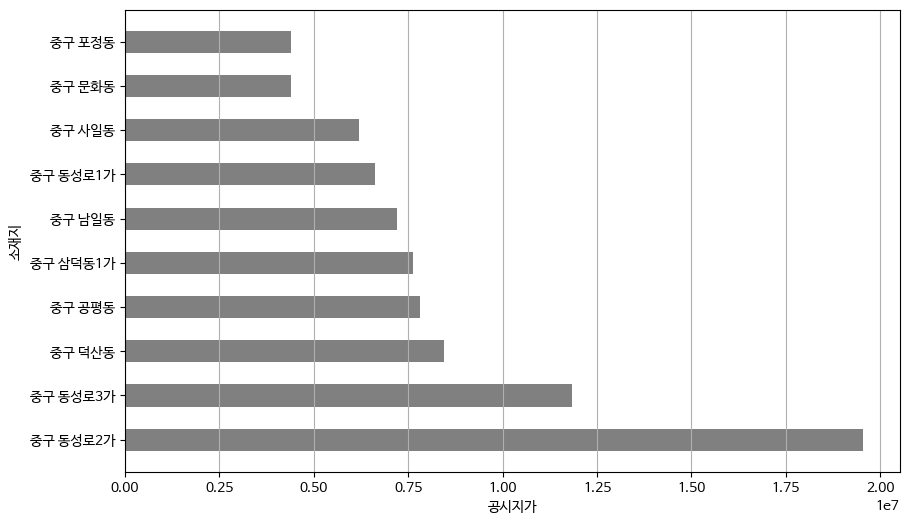

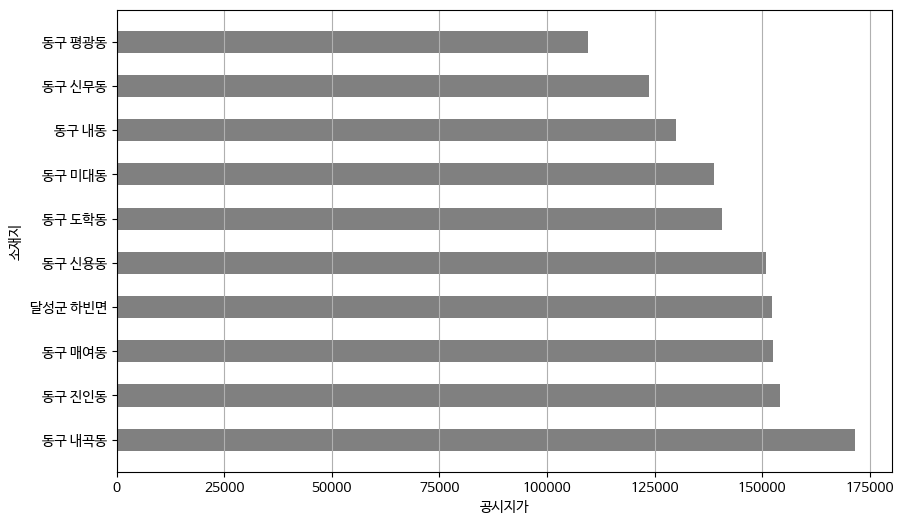

In [30]:
#시군구명+동명 문자열 합치기
df2['소재지_3']=df2['시군구명']+ " " + df2['소재지_1']

#상위10개 플롯 시각화
xs=df2.head(10)['소재지_3'].to_list()
ys=df2.head(10)['공시지가'].to_list()

plt.figure(figsize=(10, 6))			#그래프 크기 지정
plt.ylabel('소재지')				#그래프 x축 이름(label) 지정
plt.xlabel('공시지가')				#그래프 y축 이름(label) 지정

plt.grid(True, axis='x')

plt.barh(xs, ys, height=0.5, color='grey')



#하위10개 플롯 시각화
xs=df2.tail(10)['소재지_3'].to_list()
ys=df2.tail(10)['공시지가'].to_list()

plt.figure(figsize=(10, 6))			#그래프 크기 지정
plt.ylabel('소재지')				#그래프 x축 이름(label) 지정
plt.xlabel('공시지가')				#그래프 y축 이름(label) 지정

plt.grid(True, axis='x')

plt.barh(xs, ys, height=0.5, color='grey')